# import das bibliotecas

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
from scipy import signal
from glob import glob
from scipy import stats

rcParams['figure.figsize'] = [16., 5.]

### Filtros

In [2]:
# definições de filtros

def butter_bandpass(data, lowcut, highcut, fs=200, order=4):
    nyq = fs * 0.5
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='bandpass')
    return signal.filtfilt(b, a, data)

def butter_lowpass(data, lowcut, fs=200, order=4):
    nyq = fs * 0.5
    low = lowcut / nyq
    b, a = signal.butter(order, low, btype='lowpass')
    return signal.filtfilt(b, a, data)

def butter_highpass(data, highcut, fs=200, order=4):
    nyq = fs * 0.5
    high = highcut / nyq
    b, a = signal.butter(order, high, btype='highpass')
    return signal.filtfilt(b, a, data)

def butter_notch(data, cutoff, var=1, fs=200, order=4):
    nyq = fs * 0.5
    low = (cutoff - var) / nyq
    high = (cutoff + var) / nyq
    b, a = signal.iirfilter(order, [low, high], btype='bandstop', ftype="butter")
    return signal.filtfilt(b, a, data)

### Carregando Dados

In [3]:
# def plotData(dirs):
#     data = np.load("datasets/topicos_cc/"+dirs)
#     data = np.transpose(data, (0, 2, 1))
#     print(data.shape)
#     data_filtered = butter_notch(data, 60)
#     data_filtered = butter_highpass(data_filtered, 5)
#     data_filtered = butter_lowpass(data_filtered, 50)
#     for i in range(data_filtered.shape[1]):
#         plt.plot(data_filtered[0,i,:])
#     plt.suptitle(dirs)
#     plt.show()


In [4]:
def loadSujeito(dirs):
    data = np.load("datasets/topicos_cc/"+dirs)
    data = np.transpose(data, (0, 2, 1))
    data_filtered = butter_notch(data, 60)
    data_filtered = butter_highpass(data_filtered, 5)
    data_filtered = butter_lowpass(data_filtered, 50)
    
    return data_filtered

In [5]:
dirs = [ i.split("/")[-1] for i in glob('datasets/topicos_cc/p1*')]
data = []
for d in dirs:
    data.append(loadSujeito(d))

In [6]:
np.array(data).shape

(3, 8, 4, 1600)

### Visualizando

In [7]:
# for d in dirs:
#     plotData(d)

# Concatenando Trials x Movimentos

In [8]:
import numpy as np

#X = data.reshape(24, 4, 1600)
X = np.concatenate((data), axis=0)
X.shape


(24, 4, 1600)

## Segmentação dos dados

In [9]:
from scipy.signal import stft
data = X
step = 11.8
segment = 128
# data = X.reshape(24, 4, 1600)
# print('', data.shape)

n_win = int((data.shape[-1] - segment) / step) + 1
ids = np.arange(n_win) * int(step)

# Janelas do dado no dominio do tempo
chunks_time = np.array([data[:,:,k:(k + segment)] for k in ids]).transpose(1, 2, 0, 3)

# Janelas do dado no domínio da frequência
_, _, chunks_freq = stft(data, fs=200, nperseg=128, noverlap=115)
chunks_freq = np.swapaxes(chunks_freq, 2, 3)

print('Formato (shape) dos dados depois da divisão de janelas')
print(f'Dominio do tempo: {chunks_time.shape} - (classes+ensaios, canais, janelas, linhas)')
print(f'Dominio da frequência:  {chunks_freq.shape} - (classes+ensaios, canais, janelas, linhas)')



Formato (shape) dos dados depois da divisão de janelas
Dominio do tempo: (24, 4, 125, 128) - (classes+ensaios, canais, janelas, linhas)
Dominio da frequência:  (24, 4, 125, 65) - (classes+ensaios, canais, janelas, linhas)


## Achar as Janelas
O mesmo que a função acima, mas generico

In [10]:
# from scipy.signal import stft

# def janela(overl=64):
    
#     for i in np.arange(1, 128, 0.1):
#         step = i
#         segment = 128
#         data = X.reshape(24, 4, 1600)
        
#         _, _, chunks_freq = stft(data, fs=200, nperseg=128, noverlap=overl)
#         chunks_freq = np.swapaxes(chunks_freq, 2, 3)
#         window = chunks_freq.shape[2] 

#         n_win = int((data.shape[-1] - segment) / step) + 1
#         ids = np.arange(n_win) * int(step)

#         # Janelas do dado no dominio do tempo
#         chunks_time = np.array([data[:,:,k:(k + segment)] for k in ids]).transpose(1, 2, 0, 3)
#         time_window = chunks_time.shape[2]
            
#         if( time_window == window ):
#             return step
        
    
# step = janela(overl=64)
# print(step)

In [11]:
# all_steps = []
# for i in [0.5, 0.7, 0.8, 0.9 ]:
#     n_step = int(128*i)
#     print(n_step)
#     step = janela(overl=n_step)
#     all_steps.append(step)
    
# all_steps

In [12]:
# from scipy.signal import stft

# def time_freq(step):
    
#     segment = 128
#     data = X.reshape(24, 4, 1600)
#     print('', data.shape)

#     n_win = int((data.shape[-1] - segment) / step) + 1
#     ids = np.arange(n_win) * int(step)

#     # Janelas do dado no dominio do tempo
#     chunks_time = np.array([data[:,:,k:(k + segment)] for k in ids]).transpose(1, 2, 0, 3)

#     # Janelas do dado no domínio da frequência
#     _, _, chunks_freq = stft(data, fs=200, nperseg=128, noverlap=64)
#     chunks_freq = np.swapaxes(chunks_freq, 2, 3)

#     print('Formato (shape) dos dados depois da divisão de janelas')
#     print(f'Dominio do tempo: {chunks_time.shape} - (classes+ensaios, canais, janelas, linhas)')
#     print(f'Dominio da frequência:  {chunks_freq.shape} - (classes+ensaios, canais, janelas, linhas)')
#     return chunks_time, chunks_freq

In [13]:
# chunks_time , chunks_freq = time_freq(11.8)

## Extração e seleção de características

In [14]:
def getZC(data, th):
    tamanho = len(data)
    somatoria = 0
    
    for i in range(tamanho-1):
        resultado = (data[i] * data[i+1] )
        resultado2 = np.abs(data[i] - data[i+1])
        if(resultado < 0 ) and (resultado2 > th):
            somatoria += 1
        
    return somatoria

def fj(i, sampleRate, tamanho):
    return i * sampleRate / (2 * tamanho)

def getFMN(data):
    tamanho = len(data)
    somatoria = 0
    sumPSD = np.sum(PSD(data))
    for i in range(tamanho):
        somatoria += (fj(i, 41, tamanho) * PSD(data[i]) ) / sumPSD
        
    return somatoria



In [15]:
from math import prod

# funções auxiliares
def PSD(w):
    ''' definição da função PSD para o sinal no domínio da frequência '''
    return np.abs(w) ** 2

def wamp(x, th):
    res = np.abs(np.diff(x))
    return np.sum(res >= th, axis=-1)

def wl(x):
    res = np.abs(np.diff(x))
    return np.sum(res, axis=-1)

def var(x):
    return np.sum(x ** 2, axis=-1) / (np.prod(x.shape[:-1]) - 1)

def rms(x):
    return np.sqrt(np.sum(np.abs(x) ** 2, axis=-1) / (np.prod(x.shape[:-1])))

def fmd(w):
    return np.sum(PSD(w), axis=-1) / 2

def mmdf(w):
    return np.sum(np.abs(w), axis=-1) / 2

def zc(data,threshold):
    f =[]
    x,y,z = data.shape[:3]
    for xx in range(x):
        fx = []
        for yy in range(y):
            fy = []
            for zz in range(z):
                fy.append( getZC(data[xx][yy][zz], threshold ) )
            fx.append(fy)
        f.append(fx)
    return np.array(f)

def fmn(data):
    f =[]
    x,y,z = data.shape[:3]
    for xx in range(x):
        fx = []
        for yy in range(y):
            fy = []
            for zz in range(z):
                
                fy.append( getFMN(data[xx][yy][zz]) )
                
            fx.append(fy)
        f.append(fx)
    return np.array(f)

def A(w):
    return np.abs(w)

def getMMNF(data):
    tamanho = len(data)
    somatoria = 0
    
    sumA = np.sum(A(data))
    
    for i in range(tamanho):
        somatoria += (fj(i, 200, tamanho) * A(data[i]) ) / sumA 
        
    return somatoria

def mmnf(data):
    f =[]
    x,y,z = data.shape[:3]
    for xx in range(x):
        fx = []
        for yy in range(y):
            fy = []
            for zz in range(z):
                
                fy.append( getMMNF(data[xx][yy][zz]) )
                
            fx.append(fy)
        f.append(fx)
    return np.array(f)

def logD(data):
    from math import e
    N = np.prod(data.shape)
    
    return e ** ( np.sum(np.log10( np.abs(data) ), axis=-1) ) / N

def iemg(data):
    # tempo
    return np.sum(A(data), axis=-1)

def dasdv(data):
    #tempo
    return np.sqrt( np.sum(np.diff(data) ** 2, axis=-1) / (np.prod(data.shape[:-1]) - 1) )

def tmx(x, n):
    N = np.prod(x.shape[:-1])
    return np.abs(np.sum(x ** n, axis=-1) / N)

## Implementação do vetor

In [16]:
th = np.median(chunks_time)

In [17]:
#VAR, RMS, WL, TM5 e DASDV
#WL, IEMG, LOGD
final_data = list()
final_data.append(var(chunks_time))
final_data.append(rms(chunks_time))
final_data.append(wamp(chunks_time, th))
final_data.append(logD(chunks_time))
final_data.append(wl(chunks_time))
final_data.append(zc(chunks_time,0))

final_data.append(iemg(chunks_time))
final_data.append(dasdv(chunks_time))
final_data.append(tmx(chunks_time, 3))
final_data.append(tmx(chunks_time, 4))
final_data.append(tmx(chunks_time, 5))

final_data.append(fmd(chunks_freq))
final_data.append(mmdf(chunks_freq))
final_data.append(fmn(chunks_freq))
final_data.append(mmnf(chunks_freq))

f, Pxx_den = signal.welch(data, fs=200, nperseg=248, noverlap=223)
final_data.append(Pxx_den)

final = np.array(final_data)
final.shape

(16, 24, 4, 125)

In [18]:
# data = final.transpose(0, 1, 3, 2)
# sh = data.shape

# X = data.reshape(sh[0], int(sh[1]/3), 3 * sh[2], sh[3])

# print(X.shape)

## PCA


In [19]:
from sklearn.decomposition import PCA

In [20]:
# pca = PCA(n_components=2)

# features = list()
# for f in X:
#     classes = list()
#     for c in f:
#         C_pca = pca.fit_transform(c)
#         classes.append(C_pca)
#     features.append(classes)

# X_pca = np.array(features)

In [21]:
# X_pca.shape

## Visualização

In [22]:
# def plot_features(features, features_names, classes_names, ch_1, ch_2):
    
#     movs = np.arange(len(classes_names))
#     markers = ["o", "v", "^", "P", "*", "x", "X", "2", "3", "1", 'm', 'L', 'z', 'U', '6']
#     for f, feature in enumerate(features):
        
#         for mov, marker in zip(movs, markers):
#             # argumentos: classes, amostras, canal
#             plt.scatter(feature[mov, :, ch_1],
#                         feature[mov, :, ch_2], marker=marker)

#         plt.legend((classes_names), scatterpoints=1, loc='best',
#                    ncol=3, fontsize=8)
        
#         plt.title(features_names[f])
#         plt.xlabel('CH{}'.format(ch_1))
#         plt.ylabel('CH{}'.format(ch_2))
#         plt.show()


In [23]:


# import matplotlib.pyplot as plt
# from matplotlib import rcParams

# plt.rcParams["figure.figsize"] = (12, 12)

# features_name = ('var', 'rms', 'wamp', 'wl', 'zc','logd', 'iemg','dasdv','tm3','tm4','tm5', 'fmd', 'mmdf', 'fmn', 'mmnf')
# classes = [str(item) for item in list(range(8))]
# plot_features(X_pca, features_name, classes, 0, 1)


## Transpose para Selecionar Feature

In [24]:
final.shape
# 24*26 ,9, 4
# 24*26 , 10, 4
# 24*26 , 15, 4

(16, 24, 4, 125)

In [25]:
data = final.transpose(1, 3, 2, 0)
X = data.reshape(data.shape[0]*data.shape[1], data.shape[2]*data.shape[3])
X.shape

(3000, 64)

In [26]:
# y = np.array(list(range(1, 9)) * int(X.shape[0] / 8)) # Antigo

y = [ [(i)] * int(X.shape[0] / 8 ) for i in range(8)]
y = np.array(y).flatten()
y.shape

(3000,)

## Seleção de características

## Variance Threshold


In [27]:
# # teste

# data_t = final.transpose(1, 3, 2, 0)
# ## X_t = data.reshape(24*26, 9, 4)
# ## X_t = data.reshape(24*26, 10, 4)
# ## X_t = data.reshape(24*26, 15, 4)
# X_t = data.reshape(24*26, 5, 4)

# data_t = X_t.transpose(2, 0, 1)
# data_t.shape


In [28]:
# from sklearn.feature_selection import VarianceThreshold
# canais = list()

# for c in data_t:
#     sel = VarianceThreshold(threshold=(.1))
#     vt = sel.fit_transform(c)
#     canais.append(vt)


### RFE (Por causa do Kernel Linear não iremos utilizar)

In [29]:
# from sklearn.feature_selection import RFE
# from sklearn.svm import SVC
# estimator = SVC(kernel="linear")
# selector = RFE(estimator, n_features_to_select=5, step=1)
# selector = selector.fit(X, y)
# s = selector.fit_transform(X, y)

### GenericUnivariateSelect

In [30]:
# X.shape, y.shape

In [31]:
# from sklearn.feature_selection import GenericUnivariateSelect, chi2
# transformer = GenericUnivariateSelect(chi2, mode='k_best', param=10)
# X_new = transformer.fit_transform(X, y)
# X_new.shape

In [32]:
# from sklearn.feature_selection import SelectKBest
# X_new = SelectKBest(k=10).fit_transform(X, y)

In [33]:
# X.shape, X_new.shape

## Normalização

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_norm = scaler.fit_transform(X)

# X_new_norm = scaler.fit_transform(X_new)

## SVM

In [35]:
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn import metrics

def do_svm(X,y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True)

    clf = SVC(gamma='scale')
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    
    acc = metrics.accuracy_score(y_test, y_pred)
    
    return acc

do_svm(X,y), do_svm(X_norm,y)

(0.11444444444444445, 0.6377777777777778)

# Combinations

In [36]:
# from itertools import combinations

# best_acc = 0
# best_comb = 0
# for comb in range(1,12):
#     for res in combinations(range(9),comb):
#         acc = do_svm(X_norm.take(res, axis=1), y)

#         if acc > best_acc:
#             best_acc = acc
#             best_comb = res

# print(f"Melhor Acurácia: {best_acc}, Melhor Combinação: {best_comb}")

# features_name = ('var', 'rms', 'wamp', 'wl', 'zc','logd', 'fmd', 'mmdf', 'fmn', 'mmnf')
# for i in best_comb:
#     print(f" {i} --- {features_name[i]}")


In [37]:
# from itertools import combinations

# best_acc = 0
# best_comb = 0
# for comb in range(1,12):
#     for res in combinations(range(9),comb):
#         acc = do_svm(X.take(res, axis=1), y)

#         if acc > best_acc:
#             best_acc = acc
#             best_comb = res

# print(f"Melhor Acurácia: {best_acc}, Melhor Combinação: {best_comb}")

# features_name = ('var', 'rms', 'wamp', 'wl', 'zc','logd', 'fmd', 'mmdf', 'fmn', 'mmnf')
# for i in best_comb:
#     print(f" {i} --- {features_name[i]}")


In [38]:
# from itertools import combinations

# best_acc = 0
# best_comb = 0
# best_k = 0
# for comb in range(1,12):
#     for res in combinations(range(9),comb):
#         for ks in range(1,41):
#             X_new = SelectKBest(k=ks).fit_transform(X, y)
#             acc = do_svm(X_new_norm.take(res, axis=1), y)

#             if acc > best_acc:
#                 best_acc = acc
#                 best_comb = res
#                 best_k = ks

# print(f"Melhor Acurácia: {best_acc}, Melhor Combinação: {best_comb}, Melhor K: {best_k}")




## RNN

In [39]:
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam
from keras.utils.np_utils import to_categorical
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder
from urllib.request import urlopen, urlretrieve

import matplotlib.pyplot as plt
%matplotlib inline

2022-06-23 14:15:09.899771: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-23 14:15:09.899831: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Divisão dos dados em treino e teste:

In [40]:

# Dividindo em conjuntos de treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_norm, y, test_size=0.3)

# treino: 80% dos 80% de treino. Validacao: 20% dos 80% de treino.
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.3, shuffle=True)


## Aplicação do algoritmo de MLP e geração dos resultados:

In [41]:
# definição de uma fração do regularizador
l = 0.01

# desenvolvimento do modelo Keras para uma MLP
model = Sequential()
model.add(Dense(20, activation='relu', input_dim=64,
                kernel_regularizer=regularizers.l2(l)))
# Aplicação de um dropout (caso necessário)
# model.add(Dropout(0.5))
model.add(Dense(10, activation='relu',
                kernel_regularizer=regularizers.l2(l)))
# Aplicação de um dropout (caso necessário)
# model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

# Aplicação de um modelo de descida de gradiente utilizando o Stocastic Gradient Descendent (SGD)
sgd = SGD(lr=0.05, momentum=0.0)
# Função de otimização da rede: ADAM
adam = Adam(lr=0.005, beta_1=0.9, beta_2=0.999)
# Função de custo baseada em dados originalmente categóricos
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam,
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=550, batch_size=15,
                    validation_data=(X_val, y_val))

Epoch 1/550


2022-06-23 14:15:11.541148: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-23 14:15:11.541167: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-23 14:15:11.541182: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (debian): /proc/driver/nvidia/version does not exist
2022-06-23 14:15:11.541613: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/alunos/a1858351/Documentos/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: 

98/98 [==============================] - 1s 2ms/step - loss: 2.2235 - accuracy: 0.2476 - val_loss: 1.9592 - val_accuracy: 0.3476
Epoch 2/550
98/98 [==============================] - 0s 1ms/step - loss: 1.8290 - accuracy: 0.3796 - val_loss: 1.7044 - val_accuracy: 0.4444
Epoch 3/550
98/98 [==============================] - 0s 1ms/step - loss: 1.6576 - accuracy: 0.4578 - val_loss: 1.6339 - val_accuracy: 0.4381
Epoch 4/550
98/98 [==============================] - 0s 1ms/step - loss: 1.5739 - accuracy: 0.4952 - val_loss: 1.5997 - val_accuracy: 0.4667
Epoch 5/550
98/98 [==============================] - 0s 1ms/step - loss: 1.5231 - accuracy: 0.5150 - val_loss: 1.5434 - val_accuracy: 0.5063
Epoch 6/550
98/98 [==============================] - 0s 1ms/step - loss: 1.4656 - accuracy: 0.5388 - val_loss: 1.5315 - val_accuracy: 0.4889
Epoch 7/550
98/98 [==============================] - 0s 1ms/step - loss: 1.4252 - accuracy: 0.5646 - val_loss: 1.4769 - val_accuracy: 0.5397
Epoch 8/550
98/98 [======

Epoch 59/550
98/98 [==============================] - 0s 1ms/step - loss: 0.9296 - accuracy: 0.7884 - val_loss: 1.2096 - val_accuracy: 0.6746
Epoch 60/550
98/98 [==============================] - 0s 1ms/step - loss: 0.9112 - accuracy: 0.7891 - val_loss: 1.2246 - val_accuracy: 0.6778
Epoch 61/550
98/98 [==============================] - 0s 1ms/step - loss: 0.8956 - accuracy: 0.8122 - val_loss: 1.1467 - val_accuracy: 0.7032
Epoch 62/550
98/98 [==============================] - 0s 1ms/step - loss: 0.9045 - accuracy: 0.8068 - val_loss: 1.1981 - val_accuracy: 0.6825
Epoch 63/550
98/98 [==============================] - 0s 1ms/step - loss: 0.9145 - accuracy: 0.7918 - val_loss: 1.2552 - val_accuracy: 0.6603
Epoch 64/550
98/98 [==============================] - 0s 1ms/step - loss: 0.8958 - accuracy: 0.8082 - val_loss: 1.1425 - val_accuracy: 0.6968
Epoch 65/550
98/98 [==============================] - 0s 1ms/step - loss: 0.9185 - accuracy: 0.7918 - val_loss: 1.1452 - val_accuracy: 0.7175
Epoch 

98/98 [==============================] - 0s 1ms/step - loss: 0.8284 - accuracy: 0.8170 - val_loss: 1.1944 - val_accuracy: 0.7079
Epoch 117/550
98/98 [==============================] - 0s 1ms/step - loss: 0.8441 - accuracy: 0.8286 - val_loss: 1.1576 - val_accuracy: 0.7159
Epoch 118/550
98/98 [==============================] - 0s 1ms/step - loss: 0.7943 - accuracy: 0.8374 - val_loss: 1.0945 - val_accuracy: 0.7317
Epoch 119/550
98/98 [==============================] - 0s 1ms/step - loss: 0.7969 - accuracy: 0.8333 - val_loss: 1.1046 - val_accuracy: 0.7206
Epoch 120/550
98/98 [==============================] - 0s 1ms/step - loss: 0.7790 - accuracy: 0.8429 - val_loss: 1.0284 - val_accuracy: 0.7746
Epoch 121/550
98/98 [==============================] - 0s 1ms/step - loss: 0.7634 - accuracy: 0.8463 - val_loss: 1.1484 - val_accuracy: 0.7254
Epoch 122/550
98/98 [==============================] - 0s 1ms/step - loss: 0.7505 - accuracy: 0.8524 - val_loss: 1.0939 - val_accuracy: 0.7238
Epoch 123/550

98/98 [==============================] - 0s 1ms/step - loss: 0.7425 - accuracy: 0.8544 - val_loss: 1.0682 - val_accuracy: 0.7524
Epoch 174/550
98/98 [==============================] - 0s 1ms/step - loss: 0.7967 - accuracy: 0.8327 - val_loss: 1.1836 - val_accuracy: 0.6984
Epoch 175/550
98/98 [==============================] - 0s 1ms/step - loss: 0.8140 - accuracy: 0.8476 - val_loss: 1.2047 - val_accuracy: 0.6794
Epoch 176/550
98/98 [==============================] - 0s 1ms/step - loss: 0.7781 - accuracy: 0.8483 - val_loss: 1.1698 - val_accuracy: 0.7111
Epoch 177/550
98/98 [==============================] - 0s 1ms/step - loss: 0.7515 - accuracy: 0.8442 - val_loss: 1.0080 - val_accuracy: 0.7778
Epoch 178/550
98/98 [==============================] - 0s 1ms/step - loss: 0.7257 - accuracy: 0.8619 - val_loss: 1.1096 - val_accuracy: 0.7302
Epoch 179/550
98/98 [==============================] - 0s 1ms/step - loss: 0.7179 - accuracy: 0.8660 - val_loss: 1.0685 - val_accuracy: 0.7429
Epoch 180/550

98/98 [==============================] - 0s 1ms/step - loss: 0.7534 - accuracy: 0.8605 - val_loss: 1.1115 - val_accuracy: 0.7413
Epoch 231/550
98/98 [==============================] - 0s 2ms/step - loss: 0.7839 - accuracy: 0.8211 - val_loss: 1.1606 - val_accuracy: 0.7238
Epoch 232/550
98/98 [==============================] - 0s 2ms/step - loss: 0.7847 - accuracy: 0.8395 - val_loss: 1.1957 - val_accuracy: 0.7222
Epoch 233/550
98/98 [==============================] - 0s 2ms/step - loss: 0.7560 - accuracy: 0.8524 - val_loss: 1.2797 - val_accuracy: 0.7333
Epoch 234/550
98/98 [==============================] - 0s 2ms/step - loss: 0.7081 - accuracy: 0.8667 - val_loss: 1.0934 - val_accuracy: 0.7540
Epoch 235/550
98/98 [==============================] - 0s 2ms/step - loss: 0.6561 - accuracy: 0.8810 - val_loss: 1.0725 - val_accuracy: 0.7349
Epoch 236/550
98/98 [==============================] - 0s 1ms/step - loss: 0.7171 - accuracy: 0.8524 - val_loss: 1.0802 - val_accuracy: 0.7397
Epoch 237/550

98/98 [==============================] - 0s 2ms/step - loss: 0.7453 - accuracy: 0.8476 - val_loss: 1.1977 - val_accuracy: 0.6635
Epoch 288/550
98/98 [==============================] - 0s 2ms/step - loss: 0.9464 - accuracy: 0.7912 - val_loss: 1.4183 - val_accuracy: 0.6746
Epoch 289/550
98/98 [==============================] - 0s 2ms/step - loss: 0.8949 - accuracy: 0.8252 - val_loss: 1.1882 - val_accuracy: 0.7159
Epoch 290/550
98/98 [==============================] - 0s 2ms/step - loss: 0.7846 - accuracy: 0.8388 - val_loss: 1.1673 - val_accuracy: 0.7333
Epoch 291/550
98/98 [==============================] - 0s 2ms/step - loss: 0.7338 - accuracy: 0.8401 - val_loss: 1.0819 - val_accuracy: 0.7111
Epoch 292/550
98/98 [==============================] - 0s 1ms/step - loss: 0.6832 - accuracy: 0.8714 - val_loss: 1.0162 - val_accuracy: 0.7587
Epoch 293/550
98/98 [==============================] - 0s 2ms/step - loss: 0.7165 - accuracy: 0.8565 - val_loss: 1.0365 - val_accuracy: 0.7587
Epoch 294/550

98/98 [==============================] - 0s 1ms/step - loss: 0.7399 - accuracy: 0.8510 - val_loss: 1.0004 - val_accuracy: 0.7667
Epoch 345/550
98/98 [==============================] - 0s 1ms/step - loss: 0.7946 - accuracy: 0.8374 - val_loss: 1.1232 - val_accuracy: 0.7317
Epoch 346/550
98/98 [==============================] - 0s 2ms/step - loss: 0.7494 - accuracy: 0.8483 - val_loss: 1.2848 - val_accuracy: 0.7190
Epoch 347/550
98/98 [==============================] - 0s 2ms/step - loss: 0.7461 - accuracy: 0.8503 - val_loss: 1.0887 - val_accuracy: 0.7381
Epoch 348/550
98/98 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.8769 - val_loss: 1.1300 - val_accuracy: 0.7270
Epoch 349/550
98/98 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.8687 - val_loss: 1.1242 - val_accuracy: 0.7095
Epoch 350/550
98/98 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.8612 - val_loss: 1.0815 - val_accuracy: 0.7254
Epoch 351/550

98/98 [==============================] - 0s 1ms/step - loss: 0.7081 - accuracy: 0.8565 - val_loss: 1.1113 - val_accuracy: 0.7254
Epoch 402/550
98/98 [==============================] - 0s 1ms/step - loss: 0.7321 - accuracy: 0.8442 - val_loss: 1.1687 - val_accuracy: 0.6905
Epoch 403/550
98/98 [==============================] - 0s 2ms/step - loss: 0.8137 - accuracy: 0.8456 - val_loss: 0.9914 - val_accuracy: 0.7667
Epoch 404/550
98/98 [==============================] - 0s 2ms/step - loss: 0.7325 - accuracy: 0.8503 - val_loss: 1.2639 - val_accuracy: 0.6889
Epoch 405/550
98/98 [==============================] - 0s 2ms/step - loss: 0.7354 - accuracy: 0.8497 - val_loss: 1.0651 - val_accuracy: 0.7460
Epoch 406/550
98/98 [==============================] - 0s 1ms/step - loss: 0.6890 - accuracy: 0.8605 - val_loss: 1.2782 - val_accuracy: 0.7016
Epoch 407/550
98/98 [==============================] - 0s 1ms/step - loss: 0.7561 - accuracy: 0.8401 - val_loss: 1.0171 - val_accuracy: 0.7508
Epoch 408/550

98/98 [==============================] - 0s 1ms/step - loss: 0.7193 - accuracy: 0.8558 - val_loss: 1.2104 - val_accuracy: 0.7095
Epoch 459/550
98/98 [==============================] - 0s 1ms/step - loss: 0.7218 - accuracy: 0.8476 - val_loss: 1.0860 - val_accuracy: 0.7667
Epoch 460/550
98/98 [==============================] - 0s 2ms/step - loss: 0.6783 - accuracy: 0.8646 - val_loss: 1.0361 - val_accuracy: 0.7492
Epoch 461/550
98/98 [==============================] - 0s 2ms/step - loss: 0.7117 - accuracy: 0.8551 - val_loss: 1.0295 - val_accuracy: 0.7238
Epoch 462/550
98/98 [==============================] - 0s 1ms/step - loss: 0.6686 - accuracy: 0.8755 - val_loss: 1.0548 - val_accuracy: 0.7667
Epoch 463/550
98/98 [==============================] - 0s 1ms/step - loss: 0.6402 - accuracy: 0.8878 - val_loss: 1.1173 - val_accuracy: 0.7524
Epoch 464/550
98/98 [==============================] - 0s 1ms/step - loss: 0.7625 - accuracy: 0.8422 - val_loss: 1.0956 - val_accuracy: 0.7286
Epoch 465/550

98/98 [==============================] - 0s 2ms/step - loss: 0.7326 - accuracy: 0.8565 - val_loss: 1.1392 - val_accuracy: 0.7317
Epoch 516/550
98/98 [==============================] - 0s 2ms/step - loss: 0.7768 - accuracy: 0.8374 - val_loss: 1.1936 - val_accuracy: 0.7270
Epoch 517/550
98/98 [==============================] - 0s 1ms/step - loss: 0.6705 - accuracy: 0.8721 - val_loss: 1.0771 - val_accuracy: 0.7365
Epoch 518/550
98/98 [==============================] - 0s 2ms/step - loss: 0.6480 - accuracy: 0.8810 - val_loss: 1.1079 - val_accuracy: 0.7397
Epoch 519/550
98/98 [==============================] - 0s 2ms/step - loss: 0.6526 - accuracy: 0.8796 - val_loss: 1.2422 - val_accuracy: 0.7206
Epoch 520/550
98/98 [==============================] - 0s 2ms/step - loss: 0.6391 - accuracy: 0.8796 - val_loss: 1.1954 - val_accuracy: 0.7556
Epoch 521/550
98/98 [==============================] - 0s 1ms/step - loss: 0.8419 - accuracy: 0.8272 - val_loss: 1.1894 - val_accuracy: 0.7206
Epoch 522/550

In [42]:
# 
# score = model.predict_classes(X_test)
# y_true = [np.where(x == 1)[0][0] for x in y_test]

predict_x=model.predict(X_test) 
score=np.argmax(predict_x,axis=1)
y_true = y_test

print('Acurácia: %0.2f%%' % (accuracy_score(y_true, score) * 100))
print('Matriz de confusão:')
print(confusion_matrix(y_true, score))
print()
print(classification_report(y_true, score, digits=5))

29/29 [==============================] - 0s 633us/step
Acurácia: 74.33%
Matriz de confusão:
[[83  4  7  4  2  0 10  1]
 [ 0 83  1  1 13  0  4  4]
 [ 4  2 95  0  6  0  0 10]
 [17  5 13 57  7  0  0  4]
 [ 1  2  5  1 95  0  5  1]
 [10  3  6  7  3 80 10  3]
 [ 4 15  0  1 11  1 89  0]
 [ 0  9  5  2  3  3  1 87]]

              precision    recall  f1-score   support

           0    0.69748   0.74775   0.72174       111
           1    0.67480   0.78302   0.72489       106
           2    0.71970   0.81197   0.76305       117
           3    0.78082   0.55340   0.64773       103
           4    0.67857   0.86364   0.76000       110
           5    0.95238   0.65574   0.77670       122
           6    0.74790   0.73554   0.74167       121
           7    0.79091   0.79091   0.79091       110

    accuracy                        0.74333       900
   macro avg    0.75532   0.74274   0.74084       900
weighted avg    0.75767   0.74333   0.74227       900



# Grafico

In [43]:
def plot_history(h):
    loss_list = [s for s in h.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in h.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in h.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in h.history.keys() if 'acc' in s and 'val' in s]
    if len(loss_list) == 0:
        print('Custo não está presente no histórico')
        return
    epochs = range(1, len(history.history[loss_list[0]]) + 1)
    # Custo
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, h.history[l], 'b',
                 label='Custo [treinamento] (' + str(str(format(
                    h.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, h.history[l], 'g',
                 label='Custo [validação] (' + str(str(format(
                    h.history[l][-1],'.5f'))+')'))
    plt.title('Custo')
    plt.xlabel('Épocas')
    plt.ylabel('Custo')
    plt.legend()
    # Acurácia
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, h.history[l], 'b',
                 label='Acurácia [treinamento] (' + str(format(
                    h.history[l][-1],'.5f'))+')')
    for l in val_acc_list:
        plt.plot(epochs, h.history[l], 'g',
                 label='Acurácia [validação] (' + str(format(
                    h.history[l][-1],'.5f'))+')')
    plt.title('Acurácia')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.show()

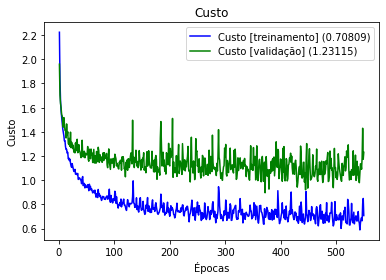

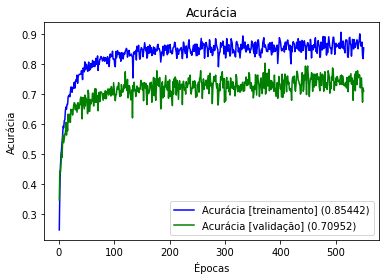

In [44]:
plot_history(history)